In [32]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import os
os.chdir('/content/drive/MyDrive/365 frontier ai/day 3/')

In [34]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [35]:
len(words)

32033

In [36]:
#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [37]:
#build the dataset

block_size = 3 #context length
X, Y = [], []
for w in words[:5]:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [38]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [195]:
#build the dataset

def build_dataset(words):
  block_size = 3 #context length
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] #crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1= int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])



torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [39]:
C = torch.randn((27,2))

In [40]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [41]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [42]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [43]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [44]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [45]:
a.shape

torch.Size([18])

In [46]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [47]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [48]:
emb.view(32,6)

tensor([[-0.3133,  0.8091, -0.3133,  0.8091, -0.3133,  0.8091],
        [-0.3133,  0.8091, -0.3133,  0.8091,  0.0962, -0.1524],
        [-0.3133,  0.8091,  0.0962, -0.1524,  0.6078,  0.7420],
        [ 0.0962, -0.1524,  0.6078,  0.7420,  0.6078,  0.7420],
        [ 0.6078,  0.7420,  0.6078,  0.7420, -0.8825, -0.6808],
        [-0.3133,  0.8091, -0.3133,  0.8091, -0.3133,  0.8091],
        [-0.3133,  0.8091, -0.3133,  0.8091,  0.1534,  1.6943],
        [-0.3133,  0.8091,  0.1534,  1.6943, -0.3712,  0.2644],
        [ 0.1534,  1.6943, -0.3712,  0.2644, -0.5692, -0.1886],
        [-0.3712,  0.2644, -0.5692, -0.1886, -0.2521, -0.6202],
        [-0.5692, -0.1886, -0.2521, -0.6202, -0.5692, -0.1886],
        [-0.2521, -0.6202, -0.5692, -0.1886, -0.8825, -0.6808],
        [-0.3133,  0.8091, -0.3133,  0.8091, -0.3133,  0.8091],
        [-0.3133,  0.8091, -0.3133,  0.8091, -0.8825, -0.6808],
        [-0.3133,  0.8091, -0.8825, -0.6808, -0.2521, -0.6202],
        [-0.8825, -0.6808, -0.2521, -0.6

In [49]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)

In [50]:
h.shape

torch.Size([32, 100])

In [51]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [52]:
logits = h @ W2 + b2

In [53]:
logits.shape

torch.Size([32, 27])

In [54]:
counts = logits.exp()

In [55]:
prob = counts /counts.sum(1, keepdims=True)

In [56]:
prob.shape

torch.Size([32, 27])

In [57]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.1544)

In [58]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [59]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [161]:
#build the dataset

block_size = 3 #context length
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [162]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [125]:
####---------cleaner version------------#####

In [196]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182580, 3]), torch.Size([182580]))

In [197]:
g = torch.Generator().manual_seed(2147483647)   #for reproducibility
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [198]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [199]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@ W1 + b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims= True)
#loss = -prob[torch.arange(32), Y].log().mean()
F.cross_entropy(logits, Ytr)
loss

tensor(2.3326, grad_fn=<NllLossBackward0>)

In [200]:
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts/counts.sum()
probs

tensor([0., 0., 0., nan])

In [201]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [202]:
logits = torch.tensor([-5, -3, 0, 5]) -5
counts = logits.exp()
probs = counts/counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [88]:
#--------------lets make neural net ------------

In [246]:
g = torch.Generator().manual_seed(2147483647)   #for reproducibility
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [247]:
sum(p.nelement() for p in parameters) #number of parameters in total

11897

In [248]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

In [249]:
lri = []
lossi = []
stepi = []

In [269]:

for i in range(50000):
  #minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  #forward pass
  emb = C[Xtr[ix]] #(32,3,2)
  h = torch.tanh(emb.view(-1,30)@ W1 + b1) #(32,100)
  logits = h @ W2 + b2 #(32,27)
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.03
  for p in parameters:
    p.data += -lr * p.grad #started with 0.1 because of plot. did 3 iteration. saw plateuing so did decay once.

  #track stats
  #lri.append(lre[i])
  lossi.append(loss.log10().item())
  stepi.append(i)

#print(loss.item())

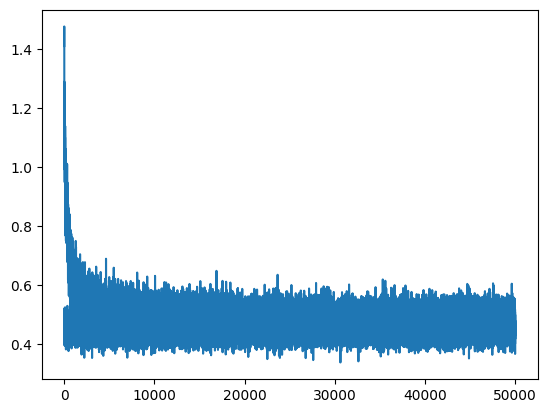

In [255]:
plt.plot(stepi, lossi)

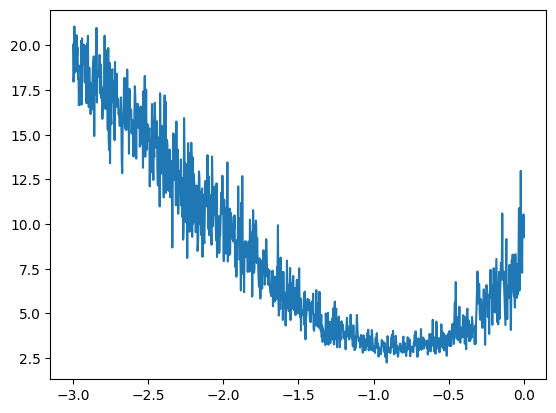

In [181]:
plt.plot(lri, lossi)

In [270]:
emb = C[Xtr]     #(32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)  #(32, 100)
logits = h @ W2 + b2   #(32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.8819, grad_fn=<NllLossBackward0>)

In [271]:
emb = C[Xdev]     #(32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)  #(32, 100)
logits = h @ W2 + b2   #(32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.8735, grad_fn=<NllLossBackward0>)

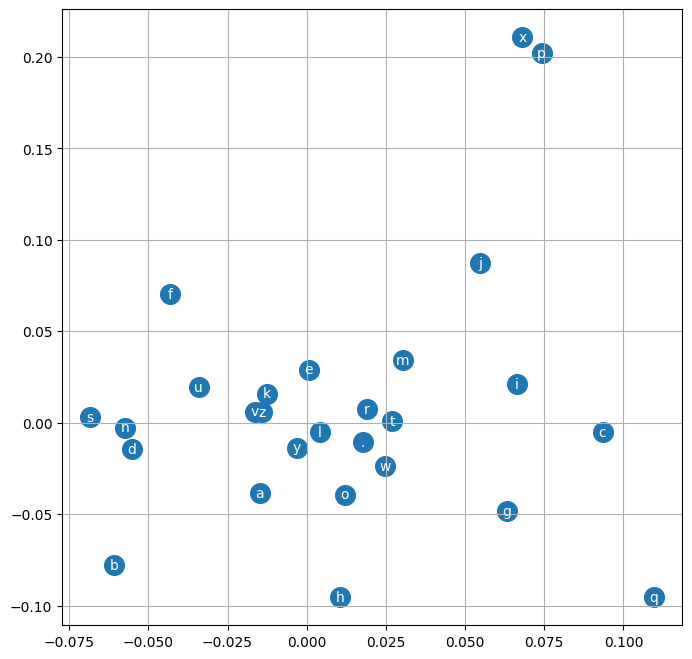

In [237]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(),C[i,1].item(),itos[i], ha="center",va="center", color="white")
plt.grid('minor')

In [ ]:
#training split, dev/validation split, test split(use very few times)
#80%, 10%, 10%

In [272]:
#sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size #initialize with all
  while True:
    emb = C[torch.tensor([context])]  #(1,block_size, d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

narmahxaae.
hl.
ihkimrl.
ieaty.
hnaadsnejr.
hnen.
emeiyhc.
iaeei.
.
e.
mniaiceaiiv.
e.
leiy.
h.
.
m.
.
oin.
edijn.
s.
